# Plots of Theoretical and Practical Running Time

In [2]:
# import statements
import csv, os, re


# for plots
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import time
import pygtrie

In [3]:
# giant_string.py (modified to generate different n)

string_files = [] # stores names

for j in range(20):
    # Prepare individual text files
    string_files.append('one_giant_string' + str(j) + '.txt')
    with open('one_giant_string' + str(j) + '.txt', 'w', encoding="utf8") as f:
        counter = 0     # Initalize counter variable
        # Load up the complete data of reviews
        with open("one_giant_string.txt", 'r', encoding="utf8") as allData:
            data = allData.read().split()
            # Load millions of words into individual text files
            while counter < j*2000000:
                f.write(data[counter] + " ")
                counter += 1
        

In [110]:
# abbreviation_converter.py (modified to run through and plot different n)
# print(string_files)
nValuesHash = []
tValuesHash = []

nValuesTrie = []
tValuesTrie = []

# Step 1: Create a dictionary of abbreviations
abbreviations = {
    "wth": "What The Hell",
    "asap": "As Soon As Possible",
    "btw": "By The Way",
    "diy": "Do It Yourself",
    "eta": "Estimated Time of Arrival",
    "fyi": "For Your Information",
    "idk": "I Don't Know",
    "imo": "In My Opinion",
    "imho": "In My Humble Opinion",
    "omw": "On My Way",
    "ttyl": "Talk To You Later",
    "wip": "Work In Progress",
    "ty": "Thank You",
    "lmao": "Laughing My A** Off",
    "lol": "Laughing Out Loud",
    "rofl": "Rolling On the Floor Laughing",
    "icymi": "In Case You Missed It",
    "tldr": "Too Long Didn't Read",
    "tmi": "Too Much Information",
    "lmk": "Let Me Know",
    "nvm": "Nevermind",
    "ftw": "For The Win",
    "np": "No Problem",
    "jk": "Just Kidding",
    "jw": "Just Wondering",
    "rn": "Right Now",
    "irl": "In Real Life",
    "dae": "Does Anyone Else",
    "gg": "Good Game",
    "smh": "Shaking My Head",
    "ngl": "Not Gonna Lie",
    "ikr": "I Know Right",
    "wtf": "What The F***",
    "aa" : "Alcoholics Anonymous",
    "temp": "Temporary",
    "vs" : "Versus",
    "lb" : "Pound",
    "lbs" : "Pounds",
    "ave" : "Avenue",
    "blvd" : "Boulevard",
    "st" : "Street",
    "rd" : "Road",
    "ba" : "Bachelor of Arts",
    "bs" : "Bachelor of Science",
    "dr" : "Doctor",
    "ceo" : "Chief Executive Officer",
    "cfo" : "Chief Financial Officer",
    "cmo" : "Chief Marketing Officer",
    "vp" : "Vice President",
    "afaik" : "As Far As I Know",
    "afk" : "Away From Keyboard",
    "pst" : "Pacific Standard Time",
    "mst" : "Mountain Standard Time",
    "cst" : "Central Standard Time",
    "est" : "Eastern Standard Time",
    "utc" : "Universal Time Coordinated",
    "etc" : "Etcetera",
    "ie" : "That Is",
    "rip" : "Rest In Peace",
    "sos" : "Save Our Souls",
    "ram" : "Ramdom Access Memory",
    "url" : "Uniform Resource Locator",
    "gif" : "Grapics Interchange Format",
    "png" : "Portable Network Graphics",
    "awol" : "Absent Without Leave",
    "madd" : "Mothers Against Drunk Driving",
    "dm" : "Direct Message",
    "wfh" : "Work From Home",
    "tbh" : "To Be Honest"
    
    
}

t = pygtrie.CharTrie()
t['wth']     = "What The Hell"
t["asap"]    = "As Soon As Possible"
t["btw"]     = "By The Way"
t["diy"]     = "Do It Yourself"
t["eta"]     = "Estimated Time of Arrival"
t["fyi"]     = "For Your Information"
t["idk"]     = "I Don't Know"
t["imo"]     = "In My Opinion"
t["imho"]    = "In My Humble Opinion"
t["omw"]     = "On My Way"
t["ttyl"]    = "Talk To You Later"
t["wip"]     = "Work In Progress"
t["ty"]      = "Thank You"
t["lmao"]    = "Laughing My A** Off"
t["lol"]     = "Laughing Out Loud"
t["rofl"]    = "Rolling On the Floor Laughing"
t["icymi"]   = "In Case You Missed It"
t["tldr"]    = "Too Long Didn't Read"
t["tmi"]     = "Too Much Information"
t["lmk"]     = "Let Me Know"
t["nvm"]     = "Nevermind"
t["ftw"]     = "For The Win"
t["np"]      = "No Problem"
t["jk"]      = "Just Kidding"
t["jw"]      = "Just Wondering"
t["rn"]      = "Right Now"
t["irl"]     = "In Real Life"
t["dae"]     = "Does Anyone Else"
t["gg"]      = "Good Game"
t["smh"]     = "Shaking My Head"
t["ngl"]     = "Not Gonna Lie"
t["ikr"]     = "I Know Right"
t["wtf"]     = "What The F***"
t["aa"]      = "Alcoholics Anonymous"
t["temp"]    = "Temporary"
t["vs"]      = "Versus"
t["lb"]      = "Pound"
t["lbs"]     = "Pounds"
t["ave"]     = "Avenue"
t["blvd"]    = "Boulevard"
t["st"]      = "Street"
t["rd"]      = "Road"
t["ba"]      = "Bachelor of Arts"
t["bs"]      = "Bachelor of Science"
t["dr"]      = "Doctor"
t["ceo"]     = "Chief Executive Officer"
t["cfo"]     = "Chief Financial Officer"
t["cmo"]     = "Chief Marketing Officer"
t["vp"]      = "Vice President"
t["afaik"]   = "As Far As I Know"
t["afk"]     = "Away From Keyboard"
t["pst"]     = "Pacific Standard Time"
t["mst"]     = "Mountain Standard Time"
t["cst"]     = "Central Standard Time"
t["est"]     = "Eastern Standard Time"
t["utc"]     = "Universal Time Coordinated"
t["etc"]     = "Etcetera"
t["ie"]      = "That Is"
t["rip"]     = "Rest In Peace"
t["sos"]     = "Save Our Souls"
t["ram"]     = "Ramdom Access Memory"
t["url"]     = "Uniform Resource Locator"
t["gif"]     = "Grapics Interchange Format"
t["png"]     = "Portable Network Graphics"
t["awol"]    = "Absent Without Leave"
t["madd"]    = "Mothers Against Drunk Driving"
t["dm"]      = "Direct Message"
t["wfh"]     = "Work From Home"
t["tbh"]     = "To Be Honest"



# Step 2: Define a function to replace abbreviations in a line


def hash_replace_abbreviations(line, abbrev_dict):
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in abbrev_dict.keys()) + r')\b', re.IGNORECASE)
    return pattern.sub(lambda x: abbrev_dict[x.group().lower()], line)

def trie_get_value(x, t):
    if t.has_key(x.lower()):
        #print(t.longest_prefix(x).value)
        return (t.longest_prefix(x.lower()).value[0])

def trie_replace_abbreviations(line, t):
    pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key)
                         for key in t.keys()) + r')\b', re.IGNORECASE)
    return pattern.sub(lambda x: trie_get_value(x.group(), t), line)

def hash_algorithm():
    output_file = "converted_giant_string.txt"
    st, ft = 0, 0
    for i in range(len(string_files)):
        # Read the input and process it all line by line
        with open(string_files[i], 'r', encoding='utf-8') as infile:
            with open(output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    # Replace abbreviations in the current line
                    st = time.time()
                    converted_line = hash_replace_abbreviations(line, abbreviations)
                    ft = time.time()
                    # Write the converted line to the output file
                    outfile.write(converted_line)
        running_time = ft - st
        print("Conversion completed.")
        print("Practical Running Time in Seconds: ", running_time)
        nValuesHash.append(i*2000000)
        tValuesHash.append(running_time)

def trie_algorithm():
    output_file = "converted_giant_string.txt"
    st, ft = 0, 0
    for i in range(len(string_files)):
        with open(string_files[i], 'r', encoding='utf-8') as infile:
            with open(output_file, 'w', encoding='utf-8') as outfile:
                for line in infile:
                    # Replace abbreviations in the current line
                    st = time.time()
                    converted_line = trie_replace_abbreviations(line, t)
                    ft = time.time()
                    # Write the converted line to the output file
                    outfile.write(converted_line)
        
        running_time = ft - st
        print("Conversion completed.")
        print("Practical Running Time in Seconds: ", running_time)
        nValuesTrie.append(i*2000000)
        tValuesTrie.append(running_time)

hash_algorithm()
trie_algorithm()


Conversion completed.
Practical Running Time in Seconds:  0
Conversion completed.
Practical Running Time in Seconds:  3.419002056121826
Conversion completed.
Practical Running Time in Seconds:  7.227998495101929
Conversion completed.
Practical Running Time in Seconds:  10.684999704360962
Conversion completed.
Practical Running Time in Seconds:  14.311523914337158
Conversion completed.
Practical Running Time in Seconds:  17.977317333221436
Conversion completed.
Practical Running Time in Seconds:  21.37250518798828
Conversion completed.
Practical Running Time in Seconds:  24.440671682357788
Conversion completed.
Practical Running Time in Seconds:  27.254515647888184
Conversion completed.
Practical Running Time in Seconds:  30.803534507751465
Conversion completed.
Practical Running Time in Seconds:  34.16505670547485
Conversion completed.
Practical Running Time in Seconds:  37.73521161079407
Conversion completed.
Practical Running Time in Seconds:  41.4955108165741
Conversion completed.
P

Text(0.5, 1.0, 'Actual Running Time - Hash')

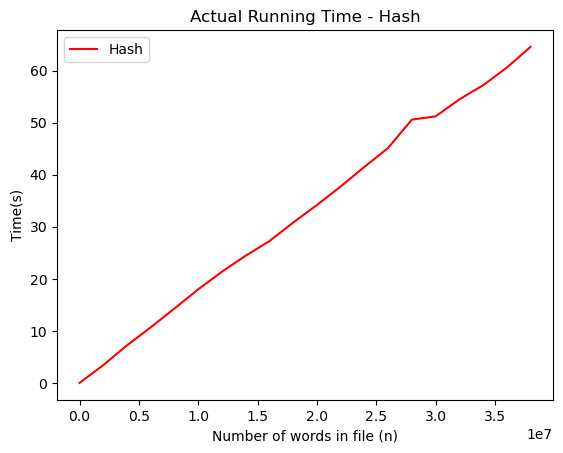

In [111]:
# practical plot for hash

plt.plot(nValuesHash, tValuesHash, color='red', label="Hash")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Hash")

Text(0.5, 1.0, 'Actual Running Time - Trie')

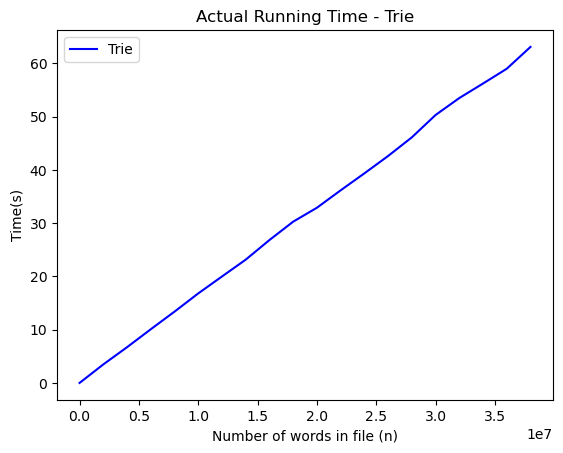

In [112]:
# practical plot for trie

plt.plot(nValuesTrie, tValuesTrie, color='blue', label="Trie")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Trie")

Text(0.5, 1.0, 'Actual Running Time - Trie')

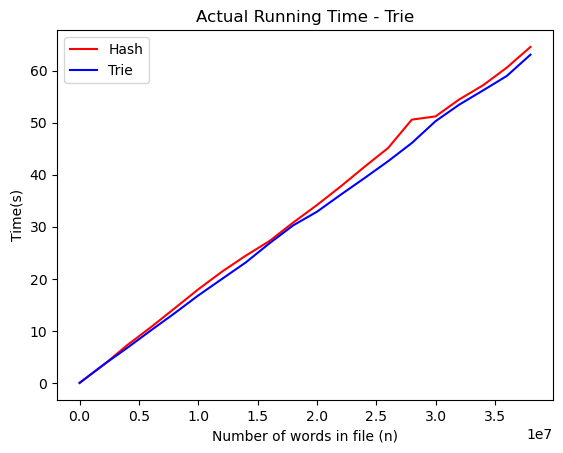

In [113]:
# combined plot

plt.plot(nValuesHash, tValuesHash, color='red', label="Hash")
plt.plot(nValuesTrie, tValuesTrie, color='blue', label="Trie")

plt.xlabel("Number of words in file (n)")
plt.ylabel("Time(s)")
plt.legend()
plt.title("Actual Running Time - Trie")

69


Text(0.5, 1.0, 'Theoretical Running Time')

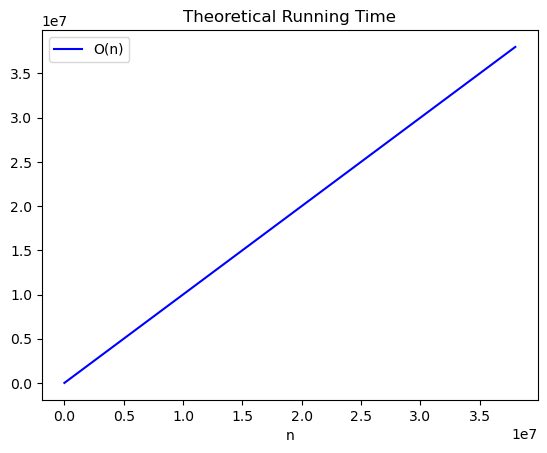

In [133]:
## theoretical plot
m = int(len(abbreviations))
print(m)
plt.plot(nValuesHash, nValuesHash, color='blue', label="O(n)")
#plt.plot(nValuesHash, [x * m for x in nValuesHash], color='red', label="O(mn)")
#plt.ylim(0, 40000000)
plt.xlabel("n")
plt.legend()
plt.title("Theoretical Running Time")

In [96]:


def test1():
    string = "Yay, lol I love this song rOfl"
    print(hash_replace_abbreviations(string, abbreviations))

    print(trie_replace_abbreviations(string, t))

    print("rOFL".lower())
    
test1()

Yay, Laughing Out Loud I love this song Rolling On the Floor Laughing
Yay, Laughing Out Loud I love this song Rolling On the Floor Laughing
rofl
